# 例1 高斯朴素贝叶斯分类器

在scikit-learn中实现高斯朴素贝叶斯的类是GaussianNB，其调用方式举例如下：

In [6]:
from sklearn import datasets
iris = datasets.load_iris()

from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(iris.data, iris.target)

print("gnb.class_prior_=", gnb.class_prior_)
print("gnb.class_count_=", gnb.class_count_)
print("gnb.theta_=", gnb.theta_)

gnb.class_prior_= [0.33333333 0.33333333 0.33333333]
gnb.class_count_= [50. 50. 50.]
gnb.theta_= [[5.006 3.428 1.462 0.246]
 [5.936 2.77  4.26  1.326]
 [6.588 2.974 5.552 2.026]]


# 例2 伯努利朴素贝叶斯

scikit-learn中实现伯努利朴素贝叶斯模型的类是BernoulliNB，它用如下公式计算第$i$个特征的似然度：

$$P(x_i \mid y) = P(i \mid y)x_i + (1 - P(i \mid y))(1 - x_i)$$

在调用方式上，BernoulliNB与MultinomialNB稍有不同的地方是它有一个binarize参数。参数binarize被用来当作一个阈值，将非二值特征转化为二值，比如:

In [7]:
from sklearn.naive_bayes import BernoulliNB

clf = BernoulliNB(binarize=1)  # 设置特征阈值为 1

# 可以输入非二值特征，BernoulliNB 内部会用阈值 1 将其转换为二值
X = [[0.3, 0.2], [1.3, 1.2], [1.1, 1.2]]
Y = [0, 1, 1]
clf.fit(X, Y)  # 训练
clf.predict([[0.99, 0.99]])  # 预测

array([0])

因为代码中binarize的阈值为1，所以特征$[0.99,0.99]$被认为与$[0.3,0.2]$是同一类标签，而与在数值上距离更近的$[1.1,1.2]$为不同标签。

# 例3 DecisionTreeClassifier与DecisionTreeRegressor

scikit-learn 在 sklean.tree 包中实现了 CART 模型，分别用 DecisionTreeClassifier 和DecisionTreeRegressor 实现了分类树和回归树。它们的训练与预测调用与其他模型类似，下面是本节开始建模时如下所示数据的训练代码。

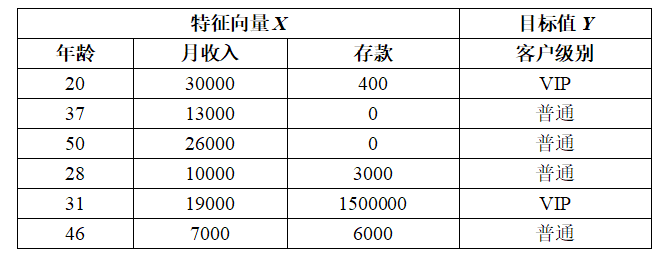

In [1]:
from sklearn import tree  # 引入tree包

X = [[20, 30000, 400],
     [37, 13000, 0],
     [50, 26000, 0],
     [28, 10000, 3000],
     [31, 19000, 1500000],
     [46, 7000, 6000]]

Y = [1, 0, 0, 0, 1, 0]

clf = tree.DecisionTreeClassifier(criterion="entropy")  # 初始化用熵模型训练的对象
clf = clf.fit(X, Y)  # 训练
print('显示预测结果', clf.predict([[40, 6000, 0]]))  # 预测
print('显示特征重要性', clf.feature_importances_)  # 查看特征重要性


显示预测结果 [0]
显示特征重要性 [0.5 0.5 0. ]


上述代码最后访问了一个决策树模型独特的属性feature_importances_，它返回的是模型中特征向量每个维度的重要性，数值越高重要性越大，计算重要性的依据就是该特征所在树结点的信息增益。此外，一些模型特有的重要初始化参数如下。

- criterion：取值gini或entropy，即使用基尼指数还是熵计算信息增益。
- max_depth：树的最大深度。
- min_samples_split：继续分裂一个结点最少需要的训练样本数。
- min_samples_leaf：叶子结点最少含有的训练样本数
- max_leaf_nodes：叶子结点的最大总数。
- min_impurity_decrease：用于计算叶子结点的最小纯度(即不同目标值样本之间的比值)。
  
这些参数主要围绕如何控制分裂结点特征的选取和防止过度拟合的训练后剪枝。

**树的可视化**

在实际应用中选择决策树模型的最主要原因就是模型易于理解，可以快速分析各特征维度的重要程度，所以scikit-learn为该模型提供了方便的树图导出方案。该方案在使用之前必须安装跨平台的图形库graphviz，比如在Mac中可以这样做

```bash
brew install graphviz
```

在 Linux 中也可以用类似的包管理工具安装，在 Windows 中安装时可以从官网www.graphviz.org下载最新的安装程序。

现在可以用sklearn.tree包中的export_graphviz()函数生成树图对象了，继续上一节的代码：

In [4]:
import graphviz
dot_data = tree.export_graphviz(clf, out_file=None,
    feature_names=["age", "income", "savings"],
    class_names=["regular", "VIP"],
    filled=True, rotate=True)
graph = graphviz.Source(dot_data)
graph.render("mytree")


'mytree.pdf'

其中参数 feature_names用于输入特征的名称，class_names输入目标分类名称。现在在文件系统当前目录中可以找到新文件mytree.pdf，打开后如图所示

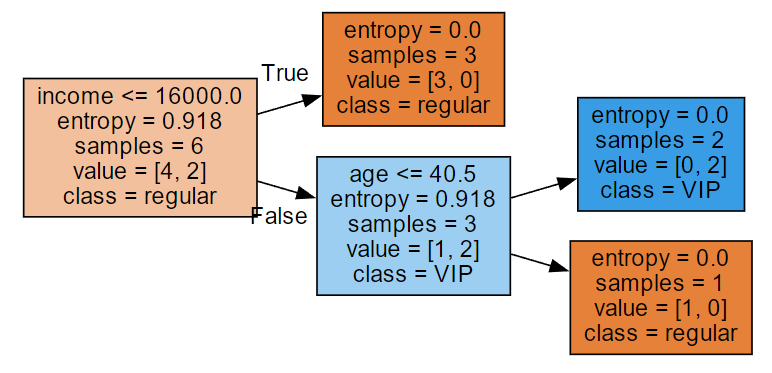

由于指定了filled和rotate参数，所以图3-15是一棵水平展开的彩色版树图。其中的颜色绘制依据是不同目标类的叶子结点有不同的颜色：本图中“class=普通”的结点为黄色；“class=VIP”的结点为蓝色；而中间结点的颜色则是其左右结点的综合。

# 例4 scikit-learn聚类调用

在 scikit-learn 的 sklearn.cluster 包中提供了多个聚类算法的封装模型。不同的模型在调用方式上大体相同，不同之处在于各算法有不同的模型初始化参数和模型属性。本节介绍sklearn.cluster.KMeans的具体调用方式。

**1. 训练和预测**

与有监督学习的分类/回归模型一样，聚类模型最重要的调用仍然是训练函数fit()与预测函数predict()。由于无监督学习没有人为给出的目标值，在scikit-learn语境中聚类问题的预测目标值变为了“分组编号”。因此聚类训练除了计算出模型内在的预测参数，同时也是对训练数据进行预测的过程。官网上的一段示例代码如下：



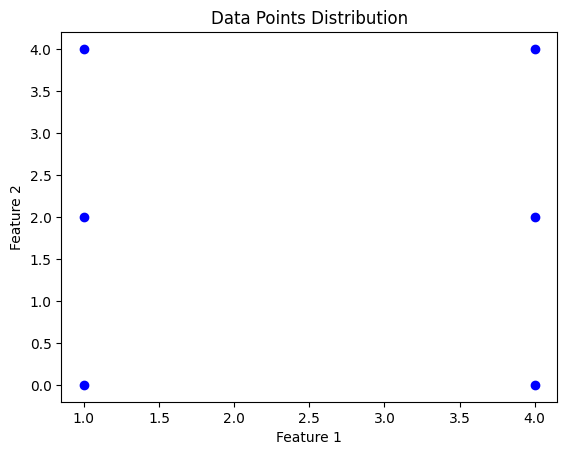

d:\ProgramData\Miniconda3\envs\torch_env2\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


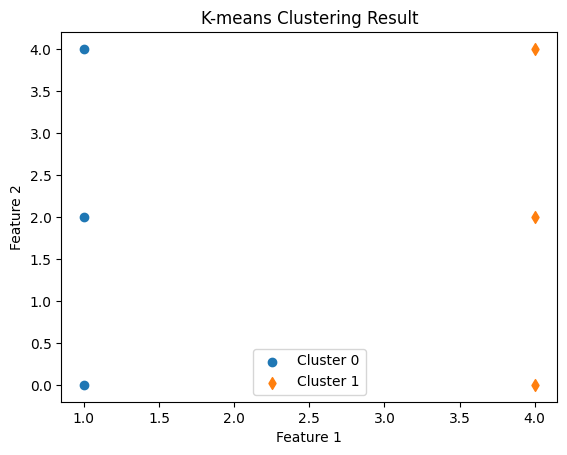

array([0, 0, 0, 1, 1, 1])

In [ ]:
import numpy as np
from sklearn.cluster import KMeans  # 引入 K-means 模型
import matplotlib.pyplot as plt  # 新增绘图库导入

X = np.array([[1, 2], [1, 4], [1, 0],
              [4, 2], [4, 4], [4, 0]])  # 样本特征向量

# 新增可视化代码
plt.scatter(X[:, 0], X[:, 1], c='blue', marker='o')
plt.title('Data Points Distribution')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

kmeans = KMeans(n_clusters=2, random_state=0).fit(X)  # 训练

# 新增聚类结果可视化
for cluster in [0, 1]:
    cluster_data = X[kmeans.labels_ == cluster]
    plt.scatter(cluster_data[:, 0], 
                cluster_data[:, 1], 
                marker='o' if cluster == 0 else 'd',  # 圆形和菱形交替
                label=f'Cluster {cluster}')

plt.title('K-means Clustering Result')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

kmeans.labels_  # 训练数据的聚类结果(已修正属性名)

In [14]:
kmeans.predict([[0,0],[4,4]])

array([0, 1])

在训练后读取模型的labels_属性可以获得训练数据的聚类结果。由于聚类算法本身对聚类后每个分组的含义一无所知，所以只能用0、1、2……这样的数组对分组进行编号。使用新数据调用predict()可以直接获得数据的分组编号。

**2. 中心点与收敛值**

在训练后可以读取模型的 cluster_centers_和 inertia_参数获得中心点坐标和最终收敛值(课件讲解中的C值)。继续上面的代码：

In [15]:
kmeans.cluster_centers_

array([[1., 2.],
       [4., 2.]])

In [16]:
kmeans.inertia_

16.0

上述代码获得两个中心点向量$＜1,2＞$和$＜4,2＞$，中心点是 K-means 模型中后续执行predict()进行样本组别划分的唯一标准。

**3. 距离查询**

除了直接预测特征向量属于哪个分组，scikit-learn还提供函数 transform()用于计算特征向量距离所有中心点的距离。很显然，距离哪个中心结点更近则更可能属于哪个分组。通过比较与不同中心点的距离，这种预测方式在一定程度上提供了分组置信度，也给使用者提供了进行目标组别排序的可能。示例代码如下:

In [17]:
kmeans.transform([[4, 2], [4, 4]])  # 查询两个向量与中心的距离

array([[3.        , 0.        ],
       [3.60555128, 2.        ]])

第一个向量与中心点1的距离为3，与中心点2的距离为0；第二个向量与中心点1的距离是3.60555128，与中心点2的距离是2；显然两者都属于第二个分组，但第一个向量的确定性更高一些。

**4. score()函数**

在有监督学习模型中，score()函数通过比较预测目标值与真实目标值来评估模型对数据的拟合程度。而在无监督学习的聚类中，scorce()函数只能用于衡量模型对测试数据的分组信心。比如在K-means中，测试数据离中心点越近则score()分值越高，反之则越低。继续如上代码：

In [18]:
kmeans.score([[2, 2], [5, 3]])  # 测试数据离中心点较远

-3.0

In [19]:
kmeans.score([[1, 2], [4, 2]])  # 测试数据即中心点

-0.0

上述模型的中心点向量是$＜1,2＞$和$＜4,2＞$，当测试数据都坐落在中心点上时，score()返回-0.0，离中心点越远返回一个越小的负值。

**5. 初始化参数**

与之前的各种scikit-learn模型一样，开发者可以对K-means的一些算法超参数以类对象初始化参数的形式进行配置。常用的K-means超参数如下。

- n_clusters：把整体数据集分为几个组。
- init：初始中心结点的选择策略，可以是“random”“k-means++”或一个自定义的数组向量。其中“k-means++”是一种倾向于选择相互距离较远的中心点初始化方法。
- max_iter：最多进行几次重新计算中心点的迭代。
- tol:inertia_小于多少时认为已经收敛并立即停止迭代，也就是本节算法介绍中的C值。
- n_init：进行几轮结点初始化和迭代。
  
由于 K-means 算法本身不保证全局最优解，所以 K-means 进行多轮“从 K-means 初始化到迭代收敛”的完整过程，选择其中inertia_最小的一轮作为最终结果。

**6. 如何选择K值**

在 K-means 算法中有一个必须人为指定的超参数 n_clusters，即定义需要将数据集划分为几组，该参数习惯上被称为“K值”。在不同的场景中K值的选择没有固定的标准。

K-means聚类结果的一个衡量标准是inertia_值越小越好，因为该值越小说明每组的成员数据之间距离越近。但随着$K$值的增加，inertia_会越来越小，直到$K$值与样本数量相同时，inertia_变为零。在任何数据集上，$K$值与 inertia_是反相关的关系，可以将$K$值的增大看成一种对 inertia_减小的贡献。但显然$K$值不能无限增大，因为这样就失去了聚类的意义。

那么什么是合适的$K$值呢？一个比较直观的方法是，选择对 inertia_贡献效果已经不显著的K值点，如图所示。

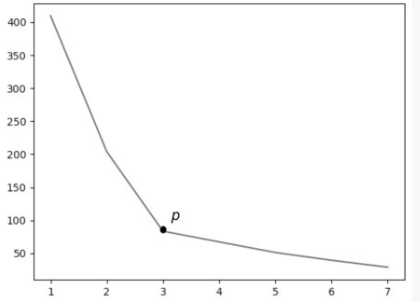

图中的横坐标是 n_clusters值(即$K$值)，纵坐标是 inertia_值。当 n_clusters=1、2时，每增加一个$K$值单位能对inertia_产生显著的降低效果，而当n_clusters=3时再增加K值对inertia_降低的效果就比较少了。因此在该数据集中，3是一个比较稳妥的$K$值选择，此时的点$P$也称为拐点。

在视觉上就可以分辨出将数据集划为三个组是一个合理的选择。当数据的特征维度较高无法用视觉识别时，采用查找$K$值曲线拐点的方法仍然可以找出合适的K值